#  Анализ продаж компьютерных игр

## Введение

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Изучение данных

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й.

Описание данных:  
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  
Данные за 2016 год могут быть неполными.

Импортируем используемые в проекте библиотеки.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

Изучим датасет.

In [1]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
data.duplicated().sum()

0

Видим что в данных есть пропуски, столбцы User_Score и Rating необхидимо привести к численному типу данных. Явных дубликатов в таблице нет.

## Предобработка данных

### Обработка названий столбцов

Приведём названия столбцов к нижнему регистру

In [5]:
# названия столбцов в lower case
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Изменение типов данных

Приведём значения в столбце user_score к типу float. В столбце user_score встречается значение 'tbd'. Обычно эта абривиатура расшифровывается как "to be determined", что означает "будет определено позже". Заменим значения 'tbd' на пустые значения NaN.

In [6]:
display(data['user_score'].unique())
data['user_score'] = data['user_score'].where(data['user_score'] != 'tbd', float('nan'))
data['user_score'] = data['user_score'].astype('float')
data.info()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


В столбце year_of_release данные можно было бы поменять с float на int, но в этом столбце есть пропуски, которые имеют тип float, поэтому не будем менять тип данных.

### Обработка пропусков

В столбцах 'name', 'genre' и 'rating' заменим пропуски на 'unknown'.

In [8]:
display(data.query('name.isna()'))
data['name'] = data['name'].fillna('unknown')
data.query('name == "unknown"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknown,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,unknown,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
display(data.query('genre.isna()'))
data['genre'] = data['genre'].fillna('unknown')
data.query('genre == "unknown"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknown,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,unknown,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknown,GEN,1993.0,unknown,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,unknown,GEN,1993.0,unknown,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
display(data.query('rating.isna()').head())
data['rating'] = data['rating'].fillna('unknown')
data.query('rating == "unknown"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,unknown


В столбцах 'year_of_release', 'critic_score' и 'user_score' мы не можем восстановить пропущенные данные или заменить чем то подходящим, поэтому оставим пропуски как есть.  
  
Возможные причины появления пропусков: в столбцах 'name' и 'genre' есть по 2 пропуска. Скорее всего они возникли из-за того, что данные об этих играх не полностью выгружены. Скорее всего та же причина пропусков и в столбце 'year_of_release'. Пропуски в столбцах 'critic_score', 'user_score' и 'rating' появились либо также из-за того что данные не выгружены в таблицу, либу потому что этих оценок или рейтинга у игры нет. 

### Добавление столбца с общими продажами

Добавим столбец 'total_sales', в котором будет сумма продаж игры по всем регионам.

In [11]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


<p>
<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Ещё такой вариант суммирования есть (как альтернатива): `data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns')` и "присвоить" этот результат новому столбцу в data.

## Исследовательский анализ данных

### Продажи по годам

Посмотрим сколько игр выпускалось в разные года

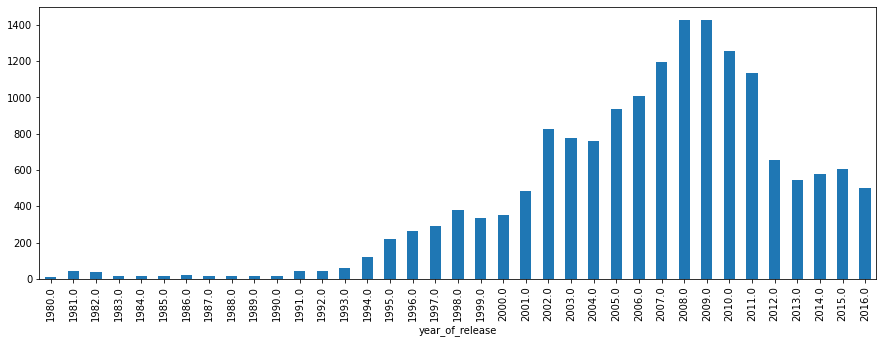

In [12]:
data.groupby('year_of_release')['platform'].count().plot(figsize=(15,5), kind='bar');

Видим что до 1994-го года продажи были очень низкими, затем с 1994-го начали расти и достигли пика в 2008-м и 2009-м годах. Затем продажи начали падать.

### Продажи по платформам

Изучим продажи игр для разных платформ по годам.  
Построим графики продаж для платформ с самым большим количеством продаж.

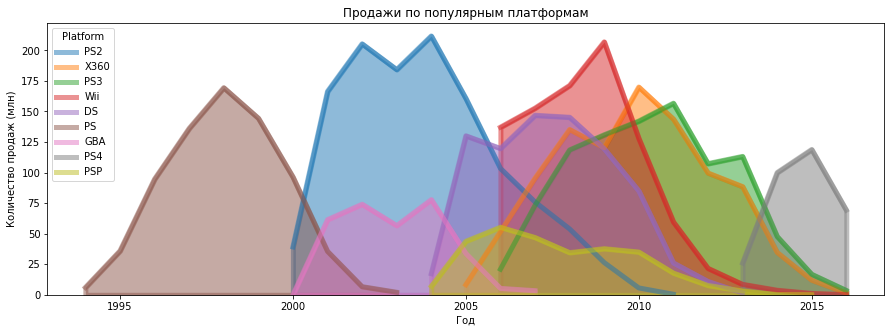

In [43]:
#для игры "Strongest Tokyo University Shogi DS" год релиза указан с ошибкой, исправим на правильный
data['year_of_release'] = data['year_of_release'].where(data['name'] != "Strongest Tokyo University Shogi DS", 2010) 

platforms = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(9).index

for platform in platforms:
    data.query('platform==@platform').groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', kind='area', alpha=0.5, figsize=(15,5), linewidth = 5)

plt.legend(platforms, loc='upper left', title='Platform');
plt.title('Продажи по популярным платформам')
plt.xlabel('Год')
plt.ylabel('Количество продаж (млн)');

Видим что платформа обычно живёт от 6 до 10 лет.

### Определение потенциально прибыльных платформ

Посмотрим график продаж для всех платформ с 2010 по 2016 что бы понять какие платформы могут быть самыми прибыльными в 2017.

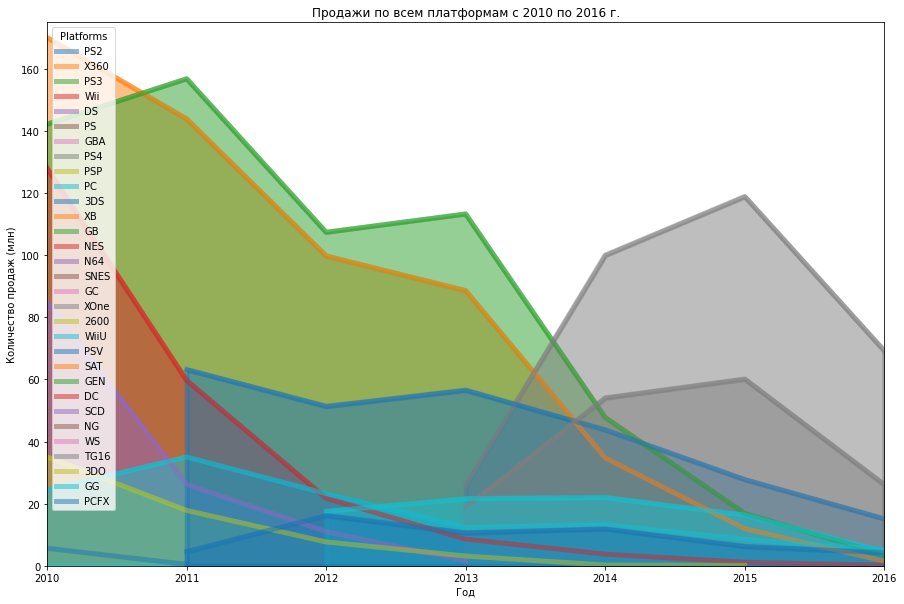

In [44]:
platforms = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index
for platform in platforms:
    data.query('platform==@platform').groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', kind='area', alpha=0.5, figsize=(15,10), linewidth = 5)
plt.legend(platforms, loc='upper left', title='Platforms');
plt.xlim(2010,2016)
plt.ylim(0,175);
plt.title('Продажи по всем платформам с 2010 по 2016 г.')
plt.xlabel('Год')
plt.ylabel('Количество продаж (млн)');

In [15]:
data.query('year_of_release==2016').groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(3)

platform
PS4     69.25
XOne    26.15
3DS     15.14
Name: total_sales, dtype: float64

Видим что продажи по всем платформам падают. Есть 3 лидера с отрывом от остальных по продажам в 2016-м году, это PS4, XOne и 3DS. PS4 и XOne существуют всего 4 года, поэтому исходя из предыдущего графика они скорее всего проживут ещё минимум 2 года. У 3DS продаж меньше, чем у первых двух платформ, и на рынке она уже 6 лет, но всё же она занимает 3-е место среди потенциально самых продаваемых платформ в 2017-м году.  
Видим что картина на рынке сильно поменялась после 2014-го года, поэтому в дальнейшем будем рассматривать период от 2014-го до 2016-го года.

### «Ящики с усами» по глобальным продажам игр в разбивке по платформам.

Построим «ящики с усами» по глобальным продажам игр в разбивке по платформам, для продаж от 2014-го года.

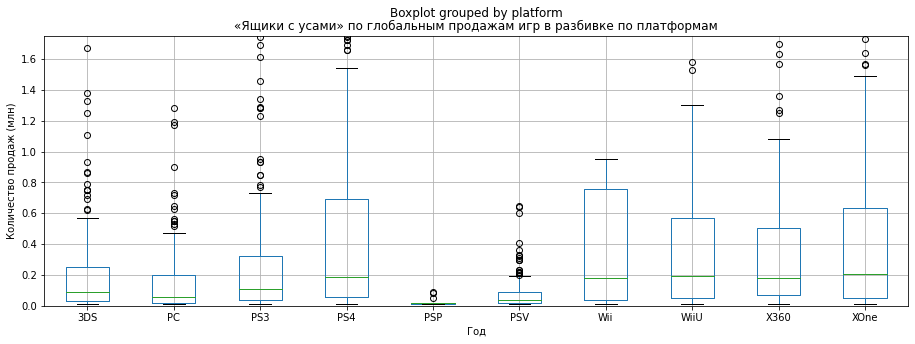

In [45]:
data.query("year_of_release>=2014").boxplot(by='platform', column='total_sales', figsize=(15,5));
plt.ylim(0, 1.75);
plt.title('«Ящики с усами» по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж (млн)');

Если судить по медианным значениям продаж, то видим что для потенциально прибыльных платформ, выявленных в прошлом пункте: PS4, XOne и 3DS, каждая отдельная игра на PS4 и XOne в среднем продаётся больше чем в 2 раза лучше, чем на 3DS. Также для платформ Wii, WiiU, X360 медианные продажы сопоставими с продажами на PS4 и XOne. На PS3 для каждой игры по медиане тоже неплохие продажи, но почти 2 раза ниже чем на PS4 и XOne, сопоставимые с 3DS.  
  
Вцелом каждая отдельная игра в 2014-2016 годах в среднем одинаково хорошо продавалась на XOne, WiiU, PS4, Wii и X360 (если судить по медианам). Но у PS4 и XOne больше всего бестселлеров с высокими продажами.

### Влияние отзывов на продажи

Посмотрим как оценки критиков и оценки игроков влияют на продажи игр. Посмотрим на примере платформы PS4 по данным с 2014 по 2016 года.  
Сначала построим диаграмму рассеяния продаж по оценкам критиков и посмотрим на корреляцию. Затем построим диаграмму рассеяния продаж по оценкам игроков и посмотрим корреляцию.

Корреляция между оценками критиков и продажами для PS4:


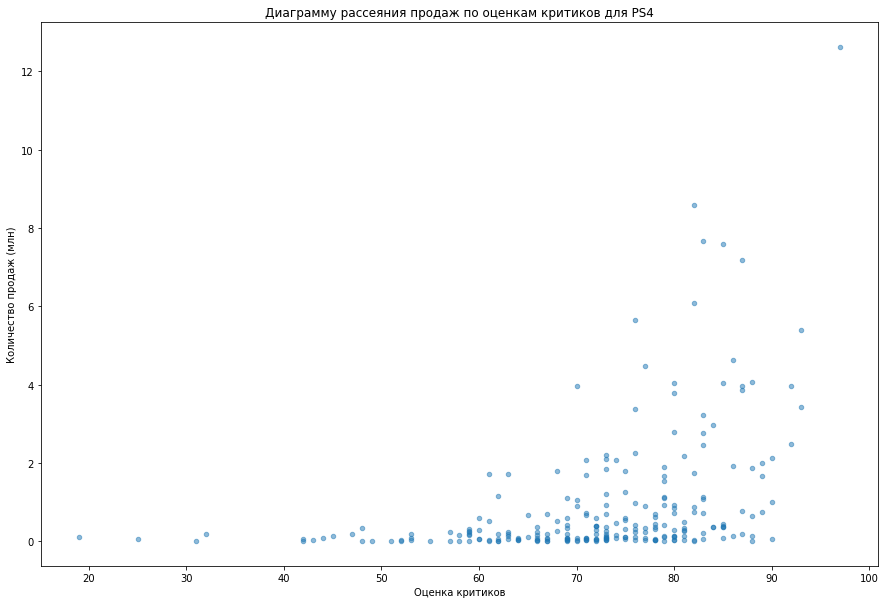

In [46]:
data.query("(platform=='PS4') & (year_of_release>=2014)").plot(x='critic_score',y='total_sales', kind='scatter', alpha=0.5, figsize=(15,10));
print("Корреляция между оценками критиков и продажами для PS4:")
data.query("(platform=='PS4') & (year_of_release>=2014)")['critic_score'].corr(data.query("(platform=='PS4') & (year_of_release>=2014)")['total_sales'])
plt.title('Диаграмму рассеяния продаж по оценкам критиков для PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж (млн)');

Корреляция между оценками игроков и продажами для PS4:


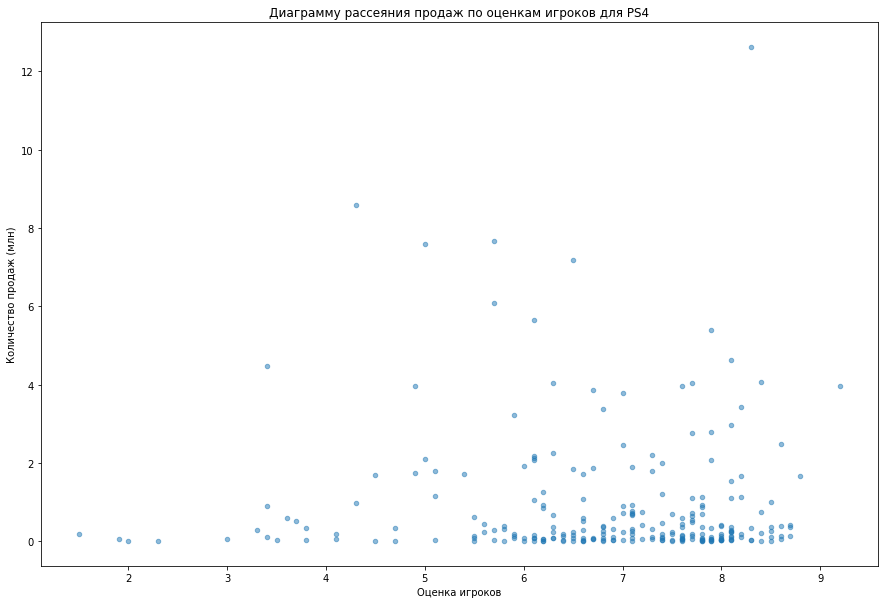

In [48]:
data.query("(platform=='PS4') & (year_of_release>=2014)").plot(x='user_score',y='total_sales', kind='scatter', alpha=0.5, figsize=(15,10));
print("Корреляция между оценками игроков и продажами для PS4:")
data.query("(platform=='PS4') & (year_of_release>=2014)")['user_score'].corr(data.query("(platform=='PS4') & (year_of_release>=2014)")['total_sales'])
plt.title('Диаграмму рассеяния продаж по оценкам игроков для PS4')
plt.xlabel('Оценка игроков') 
plt.ylabel('Количество продаж (млн)');

Видим, что между оценками критиков и продажами есть небольшая корреляция. А между оценками игроков и продажами корреляции нет. Проверим такая ли же ситуация с другими популярными платформами за период 2014-2016 г.

In [19]:
for platform in platforms:
    corr = data.query("(year_of_release>=2014) & (platform==@platform)")['critic_score'].corr(data.query("(year_of_release>=2014) & (platform==@platform)")['total_sales'])
    corr1 = data.query("(year_of_release>=2014) & (platform==@platform)")['user_score'].corr(data.query("(year_of_release>=2014) & (platform==@platform)")['total_sales'])
    if corr<10: #Отсеиваем платформы, в которых нет оценок критиков, для них corr==float('nan'), что при сравнении с 10 даёт False
        print(f"Для платформы {platform} корреляция оценок критиков и продаж: {corr.round(2)}")
        print(f"                 Корреляция оценок игроков и продаж: {corr1.round(2)}")
        print()

Для платформы X360 корреляция оценок критиков и продаж: 0.53
                 Корреляция оценок игроков и продаж: -0.14

Для платформы PS3 корреляция оценок критиков и продаж: 0.45
                 Корреляция оценок игроков и продаж: -0.17

Для платформы PS4 корреляция оценок критиков и продаж: 0.4
                 Корреляция оценок игроков и продаж: -0.04

Для платформы PC корреляция оценок критиков и продаж: 0.17
                 Корреляция оценок игроков и продаж: -0.07

Для платформы 3DS корреляция оценок критиков и продаж: 0.31
                 Корреляция оценок игроков и продаж: 0.22

Для платформы XOne корреляция оценок критиков и продаж: 0.43
                 Корреляция оценок игроков и продаж: -0.07

Для платформы WiiU корреляция оценок критиков и продаж: 0.37
                 Корреляция оценок игроков и продаж: 0.41

Для платформы PSV корреляция оценок критиков и продаж: 0.04
                 Корреляция оценок игроков и продаж: -0.17



Можно заметить что такая же ситуация с платформами X360, PS3, PS4 и XOne. Для них есть некая корреляция между оценками критиков и продажами и нет кореляции между оценками игроков и продажами.  
Для 3DS и WiiU есть небольшая корреляция и между оценками критиков и продажами и между оценками игроков и продажами.  
Для PSV и PC почти нет корреляции ни там ни там.

### Распределение игр по жанрам

Рассмотрим медианные продажи игр по каждому жанру с 2014 по 2016 г. (Не средние так-как есть игры с очень высокими продажами относительно остальных).

,total_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


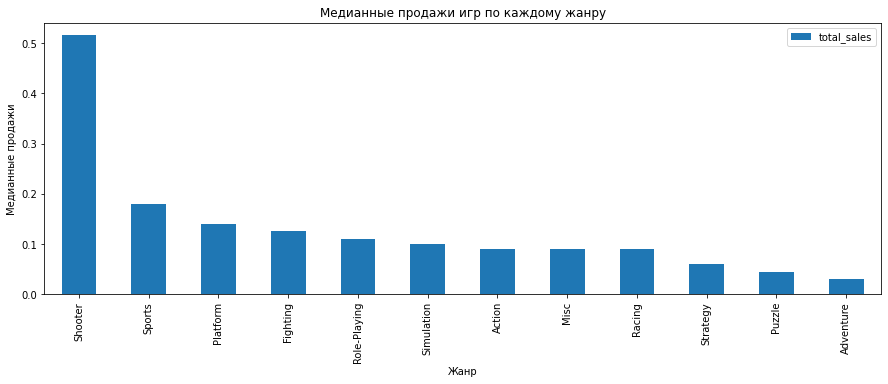

In [50]:
display(data.query("year_of_release>=2014").pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False))
data.query("year_of_release>=2014").pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False).plot(kind='bar', figsize=(15,5));
plt.title('Медианные продажи игр по каждому жанру')
plt.xlabel('Жанр')
plt.ylabel('Медианные продажи');

Игра в жанре Shooter в среденем продаётся в разы лучше, чем игра в любом другом жанре.    
Игры в жанре Sports по медианным продажам на втором месте а в жанре Platform - на третьем.  
Каждая игра в жанрах Strategy, Puzzle или Adventure в среднем продаётся хуже любой другой игры.

## Портрет пользователя каждого региона

### Топ-5 платформ для каждого региона за 2014-2016 года

Топ-5 платформ по количеству продаж и круговая диаграмма с продажами по платформам в северной Америке

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


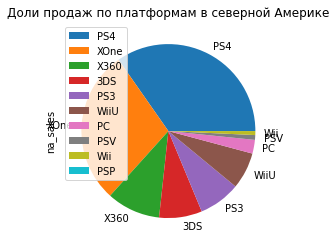

In [56]:
display(data.query("year_of_release>=2014").pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5))
data.query("year_of_release>=2014").pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).plot(y='na_sales', kind='pie');
plt.title('Доли продаж по платформам в северной Америке');

Топ-5 платформ по продажам и круговая диаграмма продаж по платформам в европе.

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


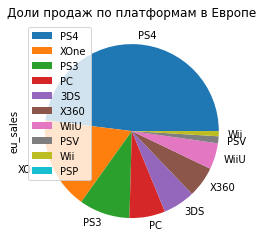

In [57]:
display(data.query("year_of_release>=2014").pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5))
data.query("year_of_release>=2014").pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).plot(y='eu_sales', kind='pie');
plt.title('Доли продаж по платформам в Европе');

Топ-5 платформ по продажам и круговая диаграмма продаж по платформам в японии.

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


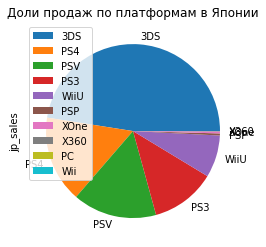

In [58]:
display(data.query("year_of_release>=2014").pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5))
data.query("year_of_release>=2014").pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).plot(y='jp_sales', kind='pie');
plt.title('Доли продаж по платформам в Японии');

### Топ-5 жанров для каждого региона для 2014-2016 годов

Топ-5 жанров и круговая диаграмма всех жанров по продажам в северной Америке.

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

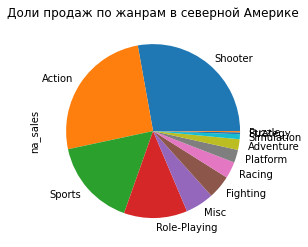

In [59]:
display(data.query("year_of_release>=2014").groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5))
data.query("year_of_release>=2014").groupby('genre')['na_sales'].sum().sort_values(ascending=False).plot(kind='pie');
plt.title('Доли продаж по жанрам в северной Америке');

Топ-5 жанров и круговая диаграмма всех жанров по продажам в европе.

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

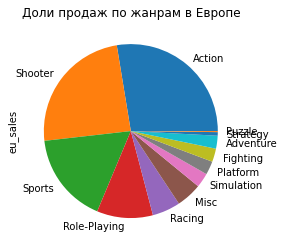

In [60]:
display(data.query("year_of_release>=2014").groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5))
data.query("year_of_release>=2014").groupby('genre')['eu_sales'].sum().sort_values(ascending=False).plot(kind='pie');
plt.title('Доли продаж по жанрам в Европе');

Топ-5 жанров и круговая диаграмма всех жанров по продажам в Японии.

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

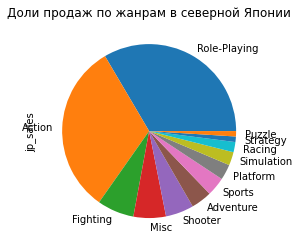

In [61]:
display(data.query("year_of_release>=2014").groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5))
data.query("year_of_release>=2014").groupby('genre')['jp_sales'].sum().sort_values(ascending=False).plot(kind='pie');
plt.title('Доли продаж по жанрам в северной Японии');

В северной Америке и Европе вкусы примерно схожие, а в Японии отличаются: там больше покупают Role-Playing и Fighting и меньше покупают Shooter.

### Влияние рейтинга ESRB на продажи в регионе

Посмотрим на распределение продаж по рейтингам ESRB в Северной Америке с 2014 по 2016 г.

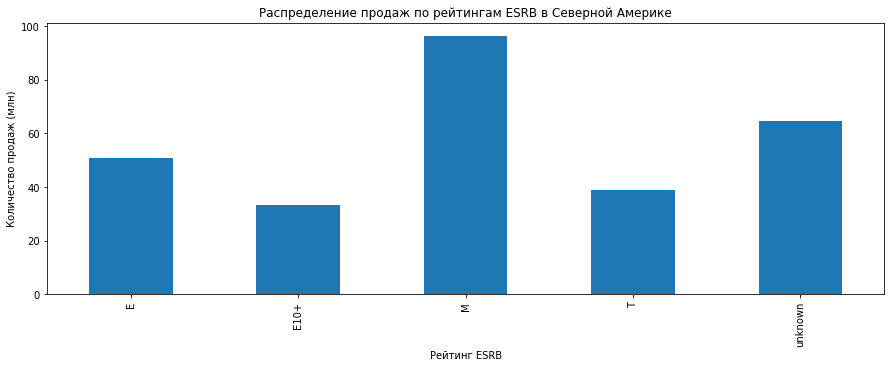

In [62]:
data.query("(year_of_release>=2014)").groupby('rating')['na_sales'].sum().plot(kind='bar', figsize=(15,5));
plt.title('Распределение продаж по рейтингам ESRB в Северной Америке')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество продаж (млн)');

Посмотрим на распределение продаж по рейтингам ESRB в Европе с 2014 по 2016 г.

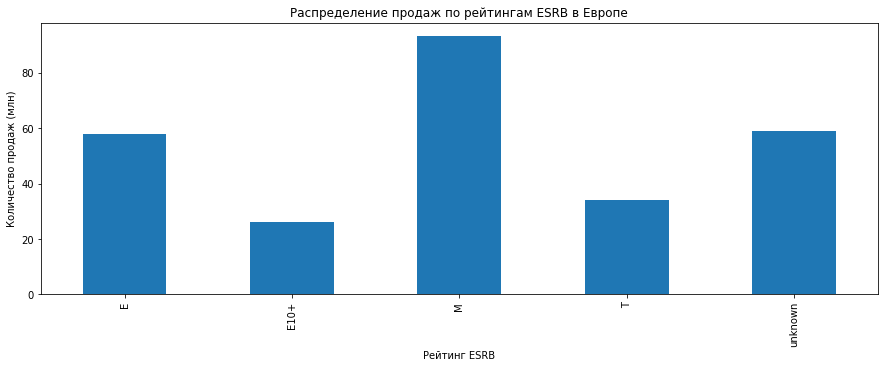

In [63]:
data.query("(year_of_release>=2014)").groupby('rating')['eu_sales'].sum().plot(kind='bar', figsize=(15,5));
plt.title('Распределение продаж по рейтингам ESRB в Европе')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество продаж (млн)');

Посмотрим на распределение продаж по рейтингам ESRB в Японии с 2014 по 2016 г.

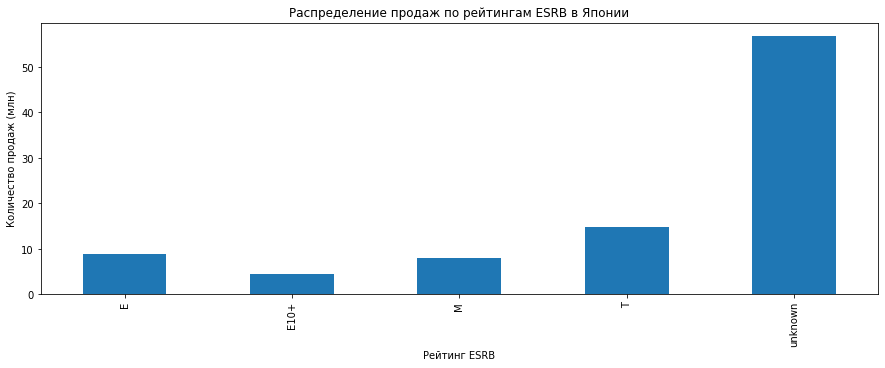

In [64]:
data.query("(year_of_release>=2014)").groupby('rating')['jp_sales'].sum().plot(kind='bar', figsize=(15,5));
plt.title('Распределение продаж по рейтингам ESRB в Японии')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество продаж (млн)');

В Америке больше всего покупают игры для взрослой ауитории, в Европе так же, но чуть больше чем в Америке покупаю игры для всех возрастов.  
В Японии подавляющее большинство игр не имеет рейтинга. Скорее всего это связано с тем, что рейтинг выдаёт Американское рейтинговое агенство, которое не оценивает большинство Японских игры.
Стреди игр, имеющих рейтинг, в Японии больше всего покупают игры для подростков от 13-ти лет.

## Проверка гипотез

Проверим гипотезу о том, что средние пользовательские рейтинки пользователей XOne и PC одинаковые. Это будет нулевая гипотеза H0, альтернативная гипотеза H1 будет: "Средние пользовательские рейтинки пользователей XOne и PC не одинаковые". Предположим что распределение рейтингов близко к нормальному и используем t-test Стьюдента. Пороговое значение для статистической значимости возьмём 5%.

In [30]:
result = st.ttest_ind(data.query("(year_of_release>=2014) & (platform=='PC')")['user_score'].dropna(), data.query("(year_of_release>=2014) & (platform=='XOne')")['user_score'].dropna())
if result.pvalue>=0.05:
    print(f'p-value = {result.pvalue}; Гипотеза H0 о том что средние равны не отвергается')
else:
    print(f'p-value = {result.pvalue}; Гипотеза H0 о том что средние равны отвергается')
    

p-value = 0.10450507919348415; Гипотеза H0 о том что средние равны не отвергается


P-Value получилась больше порогового значения 0.05, значит мы не можем отвергнуть нулевую гипотезу о том что средние пользовательские рейтинки пользователей XOne и PC одинаковые.

Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные. За нулевую гипотезу H0 возьмём гипотезу о том что они равны, альтернавтивная гипотеза H1 будет что они разные.

In [31]:
result = st.ttest_ind(data.query("(year_of_release>=2014) & (genre=='Action')")['user_score'].dropna(), data.query("(year_of_release>=2014) & (genre=='Sports')")['user_score'].dropna())
if result.pvalue>=0.05:
    print(f'p-value = {result.pvalue}; Гипотеза H0 о том что средние равны не отвергается')
else:
    print(f'p-value = {result.pvalue}; Гипотеза H0 о том что средние равны отвергается')

p-value = 2.8711147985105864e-19; Гипотеза H0 о том что средние равны отвергается


P-Value получилось меньше порогового значения 0.05, значит мы отвергаем нулевую гипотезу о равенстве средних и принимаем гипотезу что средние значения разные.  
То есть наша гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные оказалась более вероятной.

Проверим эти же гипотезы с помощью критерия Манна-Уитни. Этот критерий даёт более точный результат чем t-test Стьюдента если распределение данных отличается от нормального.

In [32]:
result = st.mannwhitneyu(data.query("(year_of_release>=2014) & (platform=='PC')")['user_score'].dropna(), data.query("(year_of_release>=2014) & (platform=='XOne')")['user_score'].dropna())
if result.pvalue>=0.05:
    print(f'p-value = {result.pvalue}; Гипотеза H0 о том что средние равны не отвергается')
else:
    print(f'p-value = {result.pvalue}; Гипотеза H0 о том что средние равны отвергается')

p-value = 0.27752869727762175; Гипотеза H0 о том что средние равны не отвергается


In [33]:
result = st.mannwhitneyu(data.query("(year_of_release>=2014) & (genre=='Action')")['user_score'].dropna(), data.query("(year_of_release>=2014) & (genre=='Sports')")['user_score'].dropna())
if result.pvalue>=0.05:
    print(f'p-value = {result.pvalue}; Гипотеза H0 о том что средние равны не отвергается')
else:
    print(f'p-value = {result.pvalue}; Гипотеза H0 о том что средние равны отвергается')

p-value = 1.2166879280294303e-16; Гипотеза H0 о том что средние равны отвергается


Критерий Манна-Уитни и t-test Стьюдента дали одинаковые результаты. Делаем выводы:  
1. Гипотеза о том, что средние пользовательские рейтинги пользователей XOne и PC одинаковые, не отвергается.  
2. Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные, доминирует над гипотезой об их равенстве.

## Вывод

1. Мы изучили данные
2. Провели предобработку данных
3. Выяснили что продажи игр вцелом падают после 2009-го года.
4. Определии средний срок жизни игровой платформы на рынке и на его основе и на основе продаж за последний период выявили 3 платформы с потенциально самыми большими продажами в 2017-м годы: это PS4, XOne и 3DS
5. Выяснили что каждая отдельная игра в 2014-2016 годах в среднем одинаково хорошо продавалась на XOne, WiiU, PS4, Wii и X360 (если судить по медианам). Но у PS4 и XOne больше всего бестселлеров с высокими продажами.
6. Выяснили что для платформ X360, PS3, PS4 и XOne есть некая корреляция между оценками критиков и продажами, но нет кореляции между оценками игроков и продажами.
7. Выяснили что игры в жанре Shooter по медианным продажам продаются в разы лучше, чем игры в любом другом жанре. Игры в жанре Sports по медианным продажам на втором месте а в жанре Platform - на третьем. Каждая игра в жанрах Strategy, Puzzle или Adventure в среднем продаётся хуже любой другой игры.
8. Рассмотрели топ 5 игровых платформ для каждого региона и на круговой диаграмме увидели их соотношения.
9. Рассмотрели топ 5 игровых жанров для каждого региона и на круговой диаграмме увидели их соотношения.
10. Рассмотрели влияние рейтинга ESRB на продажи в регионе. Выяснили, что в Америке больше всего покупают игры для взрослой ауитории, в Европе так же, но чуть больше чем в Америке покупаю игры для всех возрастов. В Японии подавляющее большинство игр не имеет рейтинга. Скорее всего это связано с тем, что рейтинг выдаёт Американское рейтинговое агенство, которое не оценивает большинство Японских игры.
Стреди игр, имеющих рейтинг, в Японии больше всего покупают игры для подростков от 13-ти лет..
11. Проверили пару гипотез:  
Гипотеза о том, что средние пользовательские рейтинги на XOne и PC одинаковые, не отверглась.  
Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные, оказалась доминирующей над гипотезой об их равенстве.  
  
Рекомендации бизнесу.  
  
В Америке и Европе делать упор на продажи игр в жанрах Shooter, Action и Sports на платформы PS4 и XOne с высокими оценками критиков и с возрастным рейтингом M.  
  
В Японии делать упор на продажи игр в жанрах Role-Playing и Action на платформы 3DS, PS4 и PSV. Для 3DS выбирать игры с высокими оценками критиков и игроков.